<h1 style="text-align: center;"><strong>1. Soluci&oacute;n de Ecuaciones No Lineales</strong></h1>

<a id='biseccion'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 1:</strong> M&eacute;todo de la Bisecci&oacute;n</span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>


$\begin{equation}
I_{k+1} = \left[a_{k+1},b_{k+1}\right] = \left\{ \begin{array}{lcc}
            \left[a_{k},x_{k}\right] &   si  & f(a_{k})f(x_{k}) < 0 \\
             \left[x_{k},b_{k}\right] &   si  & f(a_{k})f(x_{k}) > 0
             \end{array}
   \right.
\end{equation}$


<h3><strong>b) Valores Iniciales</strong></h3>



$\begin{equation}
    \left[a,b\right] \hspace{0.2cm} y \hspace{0.2cm} f(x) \hspace{0.2cm} continua
\end{equation}$

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

<div class="alert alert-block alert-success row">
    <div class="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Ventajas:</strong>
                </span>
            </span>
        </p>
        <li>Siempre converge</li>
        <li>Útil como aproximación inicial de otros métodos</li>
    </div>
    <div class ="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Desventajas:</strong>
                </span>
            </span>
        </p>
        <li>Convergencia Lenta</li>
        <li>No tiene en cuenta la magnitud d elos valores de la función en las aproximaciones calculadas, solo tiene en cuneta el sifgno de f(x), por lo que hace que una aproximación intermedia, mejor que la respuesta final, pase desapercibida  </li>
    </div>
</div>

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

![](bpseu.JPG)

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [2]:
function [x,k,error]=biseccion3(f,a,b,tol,iterMax)

    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la bisección
    %
    %Sintaxis:  biseccion1(f,a,b,tol,iterMax)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f
    %            a,b = son los extremos del intervalo [a,b]
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
    %            iterMax = cantidad de iteraciones máximas
    %            
    %Parámetros de Salida:                           
    %            x = aproximación del cero de la función f
    %            k = número de iteraciones realizados
    %            error =  |f(x)|


    pkg load symbolic
    
    f1 = matlabFunction(sym(f));  % Se obtiene la funcion
    %df = matlabFunction(diff(sym(funcion)));  % Se calcula la derivada
    
    if f1(a)*f1(b)>0
        x=[]; k=[]; error=[];
        display('El teorema de Bolzano no se cumple, es decir, f(a)*f(b)>0')
    else
        k=0;
        error=tol+1;
        e=[];
        while and(error>tol,k<iterMax)
            k=k+1;
            x=(a+b)/2;
            error=abs(f1(x));
            e=[e error];
            if f1(a)*f1(x)<0
                b=x;
            else
                a=x;
            end
        end
        plot(1:k,e)
    end
end

%help biseccion3


<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [4]:
def biseccion1(f,a,b,tol,iterMax):

    """
    Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la bisección
    
    Sintaxis:  biseccion1(f,a,b,tol,iterMax)
    
    Parámetros Iniciales: 
                f = una  cadena de caracteres (string) que representa a la función f
                a,b = son los extremos del intervalo [a,b]
                tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
                iterMax = cantidad de iteraciones máximas
                
    Parámetros de Salida: 
                [x_k,k,error], donde                
                x_k = aproximación del cero de la función f
                k = número de iteraciones realizados
                error =  |f(x_k)|
    """
    
    
    from sympy import  sympify
    import matplotlib.pyplot

    
    funcion = sympify(f)
    fa=funcion.subs({'x': a})
    fb=funcion.subs({'x': b})
    
    if fa*fb>0:
        x=[]
        k=[]
        error=[]
        display('El teorema de Bolzano no se cumple, es decir, f(a)*f(b)>0')
    else:
        error=tol+1
        k=0
        it=[]
        er=[]
        while error>tol and k<iterMax:
            k=k+1
            x=(a+b)/2
            fa=funcion.subs({'x': a})
            fx=funcion.subs({'x': x})
            error=abs(fx)
            it.append(k)
            er.append(error)
            if fa*fx<0:
                b=x                
            else:
                a=x   
    matplotlib.pyplot.plot(it, er)
    return [x,k,float(error)]

"""help(biseccion1)"""

'help(biseccion1)'

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

Utilice el método de bisección para aproximar la solucion de la ecuación $e^{x}-x-2=0$, en el intervalo $[0,2]$ para una tolerancia de $1x10^{-4}$. El resultado de la operación se da con 8 iteraciones y la aproximacion es $x_7 = 1.1484375$ 

tolerancia =  0.00010000
Symbolic pkg v2.8.0: Python communication link active, SymPy v1.4.
x =  1.1462
k =  15
error =  0.000030092


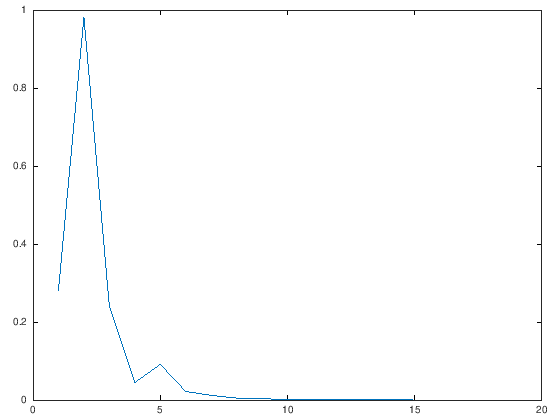

In [3]:
% Solución del ejemplo utilizando GNU Octave
a=0;
b=2;
iterMax=50;
tolerancia=1*(10**-4)
[x,k,error]=biseccion3('exp(x)-x-2',a,b,tolerancia,iterMax)

[1.14617919921875, 15, 3.00923282878784e-5]


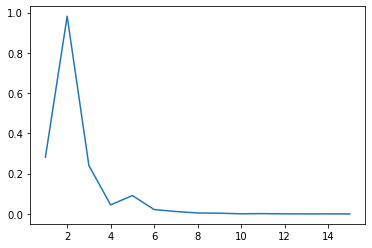

In [42]:
#Solución del ejemplo utilizando GNU Octave
a=0;
b=2;
iterMax=50;
tolerancia=1*(10**-4)
resultado=biseccion1('exp(x)-x-2',a,b,tolerancia,iterMax)
print(resultado)

<a id='metodo2'></a>
<h2><span style="color: #993300;"><strong>M&eacute;todo 2: Newton-Raphson </strong> </span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>


$ \begin{equation}
       \left\{  \begin{array}{lcc}
                 x_{k+1} = x_{k}- \frac{f(x_{k})}{f^{\prime}(x_{k})} &  donde  & f^{\prime}(x_{k}) \neq 0 \text{ para todo }  k \geq 0 \\
                 x_{0} \in \mathbb{R} & \text {valor inicial} 
                \end{array}
     \right.
    \end{equation}$


<h3><strong>b) Valores Iniciales</strong></h3>

Algún valor $x_{0}$ dado

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

<div class="alert alert-block alert-success row">
    <div class="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Ventajas:</strong>
                </span>
            </span>
        </p>
        <li> Converge muy rápido</li>
        <li>Proporciona buena precisión en los resultados.</li>
    </div>
    <div class ="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Desventajas:</strong>
                </span>
            </span>
        </p>
        <li>Tiene como restricción el cálculo de la derivada de una función.</li>
        <li>No existe un criterio general de Convergencia </li>
    </div>
</div>

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

![](npseu.JPG)

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [7]:
function [xn, err, iter, fx]= nr(f,x0,tol,maxIter)

    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de Newton-Raphson
    %Devuelve el valor de la raíz más aproximada según la tolerancia dada
    %
    %Sintaxis:  nr(f,x0,tol,maxIter)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f
    %            x0 = Valor inicial dado
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
    %            iterMax = cantidad de iteraciones máximas
    %            
    %Parámetros de Salida:                           
    %            x = aproximación del cero de la función f
    %            k = número de iteraciones realizados
    %            error =  |f(x)|

  pkg load symbolic
  f1 = matlabFunction(sym(f));  % Se obtiene la funcion
  df = matlabFunction(diff(sym(f1)));  % Se calcula la derivada
  xNext = x0;
  figure
  hold on
  for iter=0:maxIter
    xn = xNext;
    dfx = df(xn);
    if dfx == 0
      disp("Error: Division by zero");
      return
    endif
    fx = f1(xn);
    xNext = xn - fx/dfx;
    err = abs(fx);
    if err <= tol
      break
    endif
    plot(iter, err, 'ro');
    title("Newton-Raphson Method");
    xlabel("Iterations")
    ylabel("Error")
  endfor
endfunction

<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [10]:
def nr(f,x0,tol,maxIter):
    """
    Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de Newton-Raphson
    Devuelve el valor de la raíz más aproximada según la tolerancia dada
    
    Sintaxis:  nr(f,x0,tol,maxIter)
    
    Parámetros Iniciales: 
                f = una  cadena de caracteres (string) que representa a la función f
                x0 = Valor inicial dado
                tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
                iterMax = cantidad de iteraciones máximas
                
    Parámetros de Salida: 
                [xn,float(err),iter], donde                
                xn = aproximación del cero de la función f
                iter = número de iteraciones realizados
                err =  |f(x_k)|
    """
    
    
    import sympy
    import matplotlib.pyplot
    x,y,z = sympy.symbols ('x y z')  #Define x,y,z como variables de una funcion
    f1 = sympy.sympify(f) 
    df = f1.diff(x);
    xNext = x0
    k=[]
    error=[]
    iteracion=0
    for iter in range(0, maxIter):
        xn = xNext
        dfx = float(sympy.sympify(df).subs(x,xn))
        if (dfx == 0):
          print("Error: Division by zero")
          return
        fx = float(sympy.sympify(f1).subs(x,xn))
        xNext = xn - fx/dfx;
        err = abs(fx);
        error.append(err)
        k.append(iter)
        iteracion=iter
        if (err <= tol or err==0):
            break
        
    matplotlib.pyplot.plot(k, error)
    return [xn,float(err),iter]

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

Usando el método iterativo de Newton, determine una solución de la
ecuación $e^{x}-1/x=0$, con una tolerancia de $10^{-4}$ y $x_0=1$. la aproximación de la solución de la ecuación es $0.56714329$

tolerancia =  0.00010000
Symbolic pkg v2.8.0: Python communication link active, SymPy v1.4.
xn =  0.56714
err =  0.0000034595
iter =  3


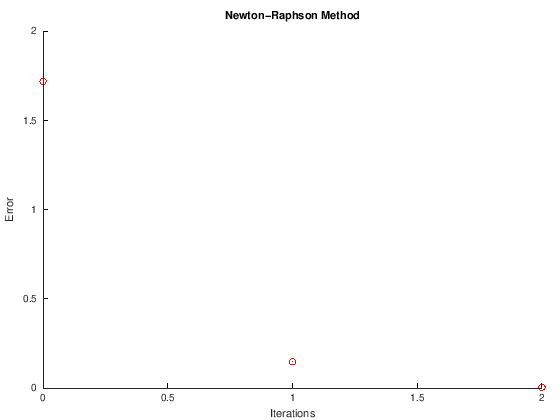

In [8]:
% Solución del ejemplo utilizando GNU Octave
x0=1;
b=2;
iterMax=50;
tolerancia=1*(10**-4)
[xn, err, iter]=nr('exp(x)-(1/x)',x0,tolerancia,iterMax)

[0.5671425803617602, 3.4594823934419594e-06, 3]

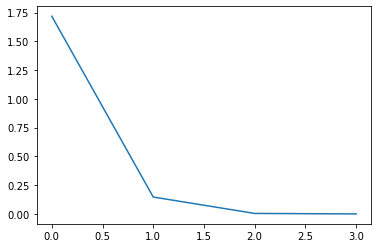

In [11]:
# Solución del ejemplo utilizando Python
x0=1;
b=2;
iterMax=50;
tolerancia=1*(10**-4)
nr('exp(x)-(1/x)',x0,tolerancia,iterMax)


# <a id='metodo2'></a>
<h2><span style="color: #993300;"><strong>M&eacute;todo 3: Método de la Secante </strong> </span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

$    
\begin{equation}
    x_{k+1} = x_{k}- \left(\frac{ x_{k}- x_{k-1}} {f(x_{k}) -f(x_{k-1}) } \right)f(x_{k})
\end{equation}
$

para k= 1,2....., donde $x_{0}$ y $x_{1}$ son los valores iniciales y se asume que $f(x_{k})-f(x_{k}) \neq 0$ para todo $k \geq 1$


<h3><strong>b) Valores Iniciales</strong></h3>

$x_{0}$ y $x_{1}$ 

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

<div class="alert alert-block alert-success row">
    <div class="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Ventajas:</strong>
                </span>
            </span>
        </p>
        <li>Se puede aplicar cuando la función f(x) es demasiado compleja como para obtener su derivada</li>
        <li>Beneficioso en aspectos computacionales, donde los algoritmos de obteción de derivadas son númericos y no algebraicos.</li>
    </div>
    <div class ="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Desventajas:</strong>
                </span>
            </span>
        </p>
        <li>Su velocidad de convergencia es emnor al de otros métodos como Newton-Raphson</li>
        <li>Tiene el riesgo de que no converga y no se pueda hallar la raíz.</li>
    </div>
</div>

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

![](spseud.JPG)

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [8]:
function [xk, err, iter]= secanteO(f,x0,x1,tol,maxIter)

    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la Secante
    %Devuelve el valor de la raíz más aproximada según la tolerancia dada
    %
    %Sintaxis:  secanteO(f,x0,x1,tol,maxIter)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f
    %            x0 = Primer valor de la iteracion
    %            x1 = Segundo  valor de la iteracion       
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
    %            iterMax = cantidad de iteraciones máximas
    %            
    %Parámetros de Salida:                           
    %            xk = aproximación del cero de la función f
    %            iter = número de iteraciones realizados
    %            error =  |f(x)|


  f1 = matlabFunction(sym(f));  % Se obtiene la funcion
  k = 2;
  figure
  hold on
  for iter=0:maxIter
    xk = x1 - f1(x1) * ((x1 - x0)/(f1(x1) - f1(x0)));
    err = abs(f1(xk));
    if (err <= tol)
      break;
    endif
    plot(iter, err, 'ro');
    title("Secant Method");
    xlabel("Iterations")
    ylabel("Error")
  endfor
endfunction

<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [13]:
def secante(f,x0,x1,tol,iterMax):   
    """
    Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de Newton-Raphson
    Devuelve el valor de la raíz más aproximada según la tolerancia dada
    
    Sintaxis:  nr(f,x0,tol,maxIter)
    
    Parámetros Iniciales: 
                f = una  cadena de caracteres (string) que representa a la función f
                x0 = Primer valor dado
                x1 = Segundo valor dado
                tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
                iterMax = cantidad de iteraciones máximas
                
    Parámetros de Salida: 
                [xn,float(err),iter], donde                
                xn = aproximación del cero de la función f
                iter = número de iteraciones realizados
                err =  |f(x_k)|
    """
    from sympy import sympify
    import matplotlib.pyplot
    x,y,z = sympy.symbols ('x y z') #Define x,y,z como variables de una funcion
    funcion = sympy.sympify(f) 
    k = 2
    error = []
    iteraciones=[]
    xk=0
    for _iter in range(1, iterMax):
        xk = float(x1 - (funcion.subs({"x": x1}) * (x1 - x0)) /
                   (funcion.subs({"x": x1}) - funcion.subs({"x": x0})))
        err = abs(float(funcion.subs({"x": xk})))
        iteraciones.append(k)
        error.append(err)
        if (err <= tol):
            break 
        k=k+1

        x0=x1
        x1=xk
    matplotlib.pyplot.plot(iteraciones, error)
    return [xk,k,err]

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

Considere la ecuación $e^{-x^{2}}=0$, y utilice el metodo de la secante para aproximar una solución de esta ecuación con una tolerancia de $ tol = 10^{-2}$ y valores iniciales de $x0=0$ y $x1=1$. Con dicha tolerancia su aproximación es $0.652917...$

tolerancia =  0.010000
xn =  0.61270
err =  0.074314
iter =  50


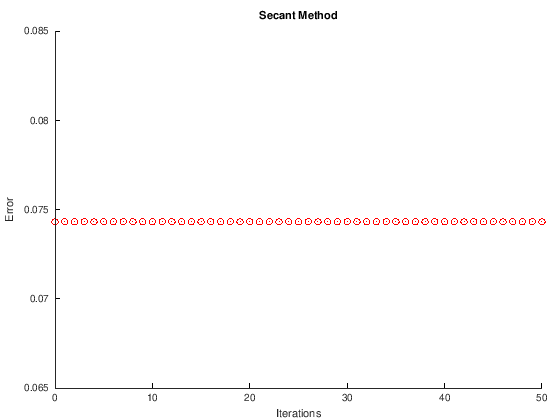

In [80]:
% Solución del ejemplo utilizando GNU Octave
x0=0;
x1=1;
iterMax=50;
tolerancia=1*(10**-2)
[xn, err, iter]=secanteO('exp(-x**2)-x',x0,x1,tolerancia,iterMax)

0.6126998367802821
0.6534421332877829


[0.6534421332877829, 3, 0.0009698520541936428]

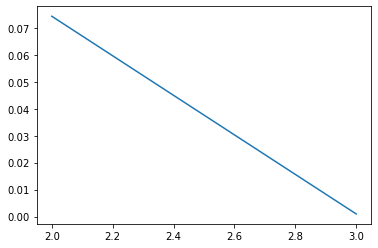

In [69]:
#Solucion en Python
x0=0;
x1=1;
iterMax=50;
tolerancia=1*(10**-2)
iterMax=50
secante('exp(-x**2)-x',x0,x1,tolerancia,iterMax)

# <a id='metodo2'></a>
<h2><span style="color: #993300;"><strong>M&eacute;todo 4: Método de la Falsa Posicion </strong> </span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

Sea $x_0 = a$ y $x_1 = b$  verificar que $f(x_0)*f(x_1) < 0$ y calcular $x_2$ utilizando:
$ 
    \begin{equation}
        x_{k+1} = x_{k}- \left(\frac{ x_{k}- x_{k-1}} {f(x_{k}) -f(x_{k-1}) } \right)f(x_{k})
    \end{equation}
    
$ 
$para k= 1,2....., donde $x_{0}$ y $x_{1}$ son los valores iniciales y se asume que $f(x_{k})-f(x_{k}) \neq 0$ para todo $k \geq 1$
   

Posteriormente, se escoge el intervalo que garantice la existencia de un cero, como :

\begin{equation}
I_{k+1} = \left[a_{k+1},b_{k+1}\right] = \left\{ \begin{array}{lcc}
            \left[a_{k},x_{k}\right] &   si  & f(a_{k})f(x_{k}) < 0 \\
             \left[x_{k},b_{k}\right] &   si  & f(a_{k})f(x_{k}) > 0
             \end{array}
   \right.
\end{equation}


<h3><strong>b) Valores Iniciales</strong></h3>

$x_{0}$ y $x_{1}$ 

<h3><strong>c) Ventajas y Desventajas</strong></h3>

<div class="alert alert-block alert-success row">
    <div class="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Ventajas:</strong>
                </span>
            </span>
        </p>
        <li>Es una mezcla de la seguridad del método de bisección con la rapidez del método de la secante, que mide los puntos con una recta que intersecta en el eje x, la cual proporciona una mejor aproximación a la raíz</li>
    </div>
    <div class ="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Desventajas:</strong>
                </span>
            </span>
        </p>
        <li>Converge lentamente a la solución, debido al efectuar las iteraciones uno de los extremos del intervalo no se modifica.</li>
    </div>
</div>

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

![](falsa.JPG)

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [10]:
function [xn, err, iter, fx]=falsePosition(funcion,an,bn,tol,maxIter)
    f=inline(funcion);
    fa=f(an);
    fb=f(bn);
    xLast=an;
    xn=bn;
    xNext=0;
    fx=0;
    k=1;
    if (fa*fb > 0)
        return
    endif
    figure
    hold on
    for iter=1:maxIter
      div=f(xn)-f(xLast);
      if div == 0;
        disp("Error: Division by zero");
        return
      endif
      fx = f(xn);
      xNext = xn - (fx*(xn - xLast))/div;
      err = abs(xNext - xn) / abs(xNext);
      if fx == 0
        a = xn;
        b = xn;
      elseif fb * fx < 0
        an = xn;
        fa = fx;
      else
        bn = xn;
        fb = fx;
      endif
      if err <= tol
      plot(iter, err, 'ro');
        return
      endif
      xLast = xn;
      xn = xNext;
      plot(iter, err, 'ro');
    endfor
endfunction

<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [12]:
from sympy import sympify as sy
from sympy import symbols as symb
import matplotlib.pyplot
def falsePosition(funcion,an,bn,tol,maxIter):
    """Resuelve una ecuación no lineal mediante el método de la Falsa Posicion.
    Devuelve el valor de la raíz más aproximada según la tolerancia dada
    unos valores iniciales x0,x1
    Parámetros:
    funcion -- Funcion dependiente de X, a cálcular su raíz
    x0      -- Primer valor inicial
    x1      -- Segundo valor inicial
    tol     -- Tolerancia miníma aceptada para encontrar la raíz
   
    """     
    
    x,y,z = symb('x y z') #Define x,y,z como variables de una funcion
    f = sy(funcion) 

    fa=f.subs({"x": an})
    fb=f.subs({"x": bn})
    xLast=an
    xn=bn
    xNext=0
    fx=0
    error = []
    iteraciones=[]
    if (fa*fb > 0):
        return
    
    for iter in range(1, maxIter):
        
      div=f.subs({"x": xn})-f.subs({"x": xLast})
      
      if (div == 0):
        print("Error: Division by zero")
        return
    
      fx = f.subs({"x": xn})
      xNext = xn - (fx*(xn - xLast))/div
      err = abs(xNext - xn) / abs(xNext)
      if (fx == 0):
        a = xn
        b = xn
      elif (fb * fx < 0):
        an = xn
        fa = fx
      else:
        bn = xn
        fb = fx
      if (err <= tol):
          matplotlib.pyplot.plot(iteraciones, error)
          return [float(xn),iter,float(err)]
      xLast = xn
      xn = xNext
      error.append(err)
      iteraciones.append(iter)


<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

Considere la ecuación $cos(x)=x$, y utilice el método de la falasa posicion para aproximar una solución con una tolerancia de $ tol = 10^{-3}$ en el intervalo $[\frac{1}{2},\frac{\pi}{4}]$

tol =  0.0010000
xn =  0.73902
err =  0.000085022
iter =  3


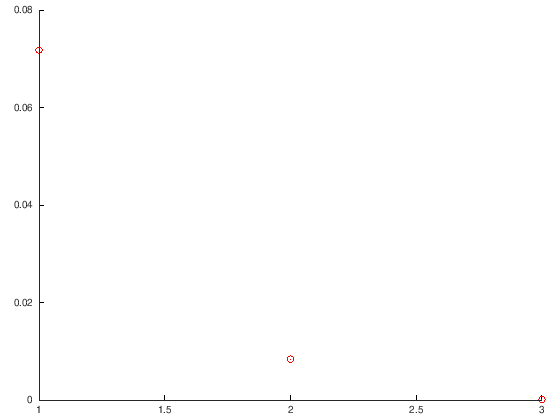

In [11]:
% Solución del ejemplo utilizando GNU Octave
an=1/4;
bn=pi/4;
maxIter=200;
tol=1*(10**-3)
[xn, err, iter]=falsePosition('cos(x)-x',an,bn,tol,maxIter)

[0.7390223815642151, 3, 8.502236811792242e-05]

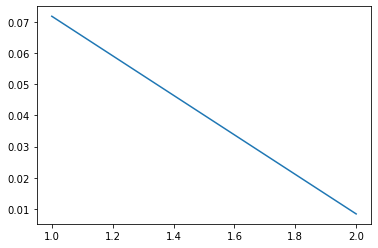

In [14]:
#Solucion en Python
from sympy import *
an=1/4;
bn=pi/4;
maxIter=200;
tol=1*(10**-3)
falsePosition('cos(x)-x',an,bn,tol,maxIter)

# <a id='metodo2'></a>
<h2><span style="color: #993300;"><strong>M&eacute;todo 5 Método del Punto Fijo </strong> </span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

$    
    \begin{equation}
        x - \phi(x) = 0
    \end{equation}
$


<h3><strong>b) Valores Iniciales</strong></h3>

a y b, los cuales representan el intervalo inicial $\left[ a,b\right]$

<h3><strong>c) Ventajas y Desventajas</strong></h3>

<div class="alert alert-block alert-success row">
    <div class="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Ventajas:</strong>
                </span>
            </span>
        </p>
        <li> Posee condiciones para asegurar la convergencia.</li>
        <li> Facil convergencia</li>
    </div>
    <div class ="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Desventajas:</strong>
                </span>
            </span>
        </p>
        <li>La convergencia depende de la magnitud de $f^{\prime}(x)$</li>
        <li>Necesidad de construir funciones $f(x)$ para iterar</li>     
        <li>Pueden existir diversas $f(x)$, por lo que hay que encontrar la adecuada.</li>
    </div>
</div>

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

![](pfpsud.JPG)

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [17]:
#{
    Resuelve una ecuación no lineal mediante el método del Punto Fijo.

    Devuelve el valor de la raíz más aproximada según la tolerancia dada
    y el valor inicial especificado

    Parámetros:
    funcion -- Funcion dependiente de X, a cálcular su raíz
    funciong -- Es el parametro funcion, despejada
    x0      -- Valor inical dado a resolver
    tol     -- Tolerancia miníma aceptada para encontrar la raíz
   
    Probado con: puntoFijo("(sin(x)-x)","(sin(x))",2,0.001)
#}

function [x, err, iter] = puntoFijo(f,g,x0,tol,maxIter)
  aprox = 0;
  func = inline(f);
  gfunc = inline(g);
  pkg load symbolic;
  syms x;
  dg = diff(g, x);
  x = x0;
  if(abs(eval(dg))<1)
    figure
    hold on
    for iter=1:maxIter
      x = gfunc(x);
      err = abs(func(x));
      if err <= tol
        plot(iter, err, 'ro');
        return
      endif
      plot(iter, err, 'ro');
    endfor
  else
    display('"El metodo no converge con la funcion g(x) dada"');
  endif
endfunction
      

<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [16]:

from sympy import sympify as sy
from sympy import symbols as symb
import matplotlib.pyplot
        
def puntoFijo(funcion,funciong,x0,tol,maxIter):
    """Resuelve una ecuación no lineal mediante el método del Punto Fijo.
    Devuelve el valor de la raíz más aproximada según la tolerancia dada
    y el valor inicial especificado
    Parámetros:
    funcion -- Funcion dependiente de X, a cálcular su raíz
    funciong -- Es el parametro funcion, despejada
    x0      -- Valor inical dado a resolver
    tol     -- Tolerancia miníma aceptada para encontrar la raíz
   
    Probado con: puntofijo("(sin(x)-x)","(sin(x))",2,0.001)
    """  
    x,y,z = symb('x y z') #Define x,y,z como variables de una funcion
    func = sy(funcion) 
    gfunc = sy(funciong)
    x = x0;
    error = []
    iteraciones=[]
    for  iter in range(1, maxIter):
        x = gfunc.subs({"x": x});
        err = abs(func.subs({"x": x}));
        if (err <= tol):
            matplotlib.pyplot.plot(iteraciones, error)
            return [float(x),iter,float(err)]
        error.append(err)
        iteraciones.append(iter)

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

Considere la ecuación $x=sen(x)$, y determine $x_5, donde (x_k) es la iteración de punto fijo y el valor inicial corresponde a $x_0=2$

tol =  0.010000
xn =  0.60646
err =  0.036498
iter =  5


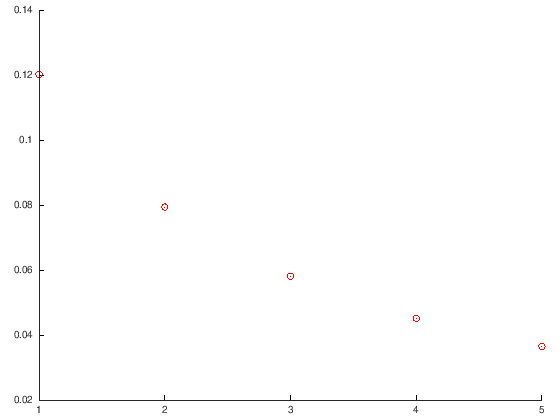

In [21]:
% Solución del ejemplo utilizando GNU Octave
x0=2;
x1=1;
maxIter=5;
tol=1*(10**-2)
[xn, err, iter]=puntoFijo("(sin(x)-x)","(sin(x))",x0,tol,maxIter)

In [20]:
# Solución del ejemplo utilizando GNU Octave
x0=2;
x1=1;
maxIter=5;
tol=1*(10**-2)
puntoFijo("(sin(x)-x)","(sin(x))",x0,tol,maxIter)

# <a id='metodo2'></a>
<h2><span style="color: #993300;"><strong>M&eacute;todo 6: Método de Muller</strong> </span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

  
Sea $\varphi$ una funcion real, definida y continua sobre un intervalo $\left[ a,b\right]$ de $\mathbb{R}$ y $\varphi(x) \in \left[ a,b\right]$. Entonces existe $\xi \in \left[ a,b\right]$, tal que $\xi= \varphi(\xi). $




<h3><strong>b) Valores Iniciales</strong></h3>

 $x_0$, $x_1$, $x_2$ valores iniciales

<h3><strong>c) Ventajas y Desventajas</strong></h3>

<div class="alert alert-block alert-success row">
    <div class="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Ventajas:</strong>
                </span>
            </span>
        </p>
        <li>Convergencia rápida</li>
        <li>Se encuentran raíces tanto reales como complejas.</li>
    </div>
    <div class ="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Desventajas:</strong>
                </span>
            </span>
        </p>
        <li>Al usar la fórmula cuadrática, es capaz de hallar raíces complejas</li>
        <li>La principal desventaja es que en cada iteración se descarta una posible raíz de la parábola sin conocer la naturaleza de la misma..</li>
    </div>
</div>

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

  <p>
        <li> Encontrar las funciones cuadraticas que pasan por los puntos: $(x0; f(x0))$; $(x1; f(x1))$ y $(x2; f(x2))$.</li>
        <li>Encontrar el valor de r mediante la formula cuadratica racionalizada.</li>
        <li>Inmediatamente se evalua, si r es la solucion de la ecuacion o esta muy cerca de x2 el metodo se detiene; en caso opuesto se continua</li>
    <li> Se encuentran los nuevos valores para x0; x1 y x2, asignandoles los valores de r y los dos mas cercanos a r entre los x0; x1 y x2 anteriores</li>
    </p>


<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [1]:
function [x2, err, iter, fx] = muller(f, x0, x1, x2, tol, maxIter)
  % Muller Method
	% Inputs:
	%   - f is a polinomial expression introduced as a symbolic expression
	%   - x0 is an initial value
  %   - x1 is an initial value
  %   - x2 is an initial value
	%   - tol is the tolerance
	% 	- maxIter is the maximum amount of iterations
	% Outputs:
	%   - x2 is the solution
	%   - err is the error
	%   - iter is the amount of completed iterations
	%   - fx is f(x)
  % Errors:
  %   - Division by zero
  %   - No real solution: no real solution found for ax**2+bx+c
  f = inline(f);
  figure
  hold on
  for iter=1:maxIter
    div = (x0 - x1)*(x0 - x2)*(x1 - x2);
    if div == 0
      disp("Error: Division by zero");
      return
    endif
    a = ((x0 - x2)*(f(x1)-f(x2))-(x1-x2)*(f(x0)-f(x2)))/div;
    b = ((x0 - x2)^2*(f(x1)-f(x2))-(x1-x2)^2*(f(x0)-f(x2)))/div;
    c = f(x2);
    disc = b^2 - 4*a*c;
    if disc < 0
      disp("Error: No real solution");
      return
    endif
    div = b + sign(b)*sqrt(disc);
    xn = x2 - 2*c/div;
    fx = f(xn);
    err = abs(xn - x2)/abs(xn);
    if err <= tol
      plot(iter, err, 'ro');
      return
    endif
    x0Dist = abs(xn - x0);
    x1Dist = abs(xn - x1);
    x2Dist = abs(xn - x2);
    if x0Dist > x2Dist && x0Dist > x1Dist
      x0 = x2;
    elseif x1Dist > x2Dist && x1Dist > x0Dist
      x1 = x2;
    endif
    plot(iter, err, 'ro');
    x2 = xn;
  endfor
endfunction

<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [25]:
from sympy import sympify as sy
from sympy import symbols as symb
import matplotlib.pyplot
import math

def muller(funcion, x0, x1, x2, tol, maxIter):
    """Resuelve una ecuación no lineal mediante el método de la Falsa Posicion.
    Devuelve el valor de la raíz más aproximada según la tolerancia dada
    unos valores iniciales x0,x1
    Parámetros:
    funcion -- Funcion dependiente de X, a cálcular su raíz
    x0      -- Primer valor inicial
    x1      -- Segundo valor inicial
    tol     -- Tolerancia miníma aceptada para encontrar la raíz
   
    """     
    x,y,z = symb('x y z') #Define x,y,z como variables de una funcion
    f = sy(funcion) 
    error = []
    iteraciones=[]

    for iter in range(0, maxIter):
        div = float((x0-x2)*(x1-x2)*(x0-x1))
        if (div == 0):
          print(x2)
          print("Error: Division by zero")
          return
        a = float((x1-x2)*(f.subs({"x": x0})-f.subs({"x": x2}))-(x0-x2)*(f.subs({"x": x1})-f.subs({"x": x2})))/div
        b = float(pow((x0-x2),2)*(f.subs({"x": x1})-f.subs({"x": x2}))-pow((x1-x2),2)*(f.subs({"x": x0})-f.subs({"x": x2})))/div
    
        c = float(f.subs({"x": x2}))
        print("a: "+str(a))
        print("b: "+str(b))
        print("c: "+str(c))
        disc = float(pow(b,2)-(4*a*c))
        if (disc < 0):
            print("Error: No real solution")
            return
        div = b + b*(math.sqrt(abs(disc)))
        xn = x2 - ((2*c)/div)
        err = abs(f.subs({"x": xn}))
        if (err <= tol):
            error.append(err)
            iteraciones.append(iter)
            matplotlib.pyplot.plot(iteraciones, error)
            return [float(xn),iter,float(err)]
        x0Dist = abs(xn - x0)
        x1Dist = abs(xn - x1)
        x2Dist = abs(xn - x2)

        if (x0Dist > x2Dist and x0Dist > x1Dist):
            x0 = (x2)
        elif (x1Dist > x2Dist and x1Dist > x0Dist):
            x1 = (x2)
        error.append(err)
        iteraciones.append(iter)
        x2 = xn
         

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

Considere la función $f(x)=sin(x) - \frac{x}{2}$, y ulizando el método de muller con $x_0=2$, $x_1=2.2$, $x_2=1.8$,  realice dos iteraciones para calcular una aproximación de un cero de dicha f.

tol =  0.010000
xn =  1.9081
err =  0.0065602
iter =  2


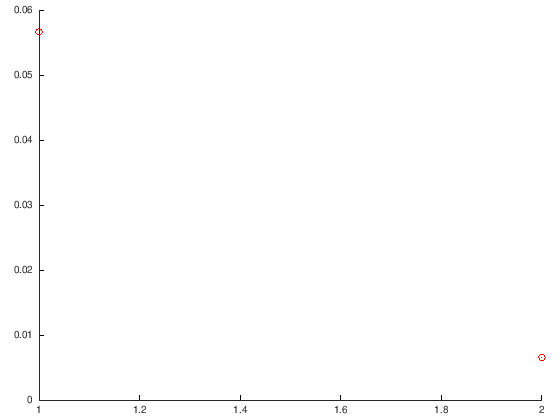

In [24]:
% Solución del ejemplo utilizando GNU Octave
x0=2;
x1=2.2;
x2=1.8;
iterMax=50;
tol=1*(10**-2)

[xn, err, iter]=muller('sin(x)-x/2', x0, x1, x2, tol, iterMax)

a: -0.4531352369197222
b: -0.7321239728786233
c: 0.07384763087819513
a: -0.4721620995631248
b: -0.8330802027971875
c: -0.012761735284534503


[1.894090388589334, 1, 0.0011488739749442312]

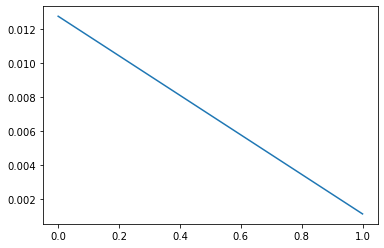

In [26]:
# Solución del ejemplo utilizando GNU Octave
x0=2;
x1=2.2;
x2=1.8;
iterMax=50;
tol=1*(10**-2)

muller('sin(x)-x/2', x0, x1, x2, tol, iterMax)